In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("BreastCancerWc.csv",sep=",")
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [24]:
df.columns = ["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"]

In [25]:
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           698 non-null    int64 
 1   Clump_Thickness              698 non-null    int64 
 2   Uniformity_of_Cell_Size      698 non-null    int64 
 3   Uniformity_of_Cell_Shape     698 non-null    int64 
 4   Marginal_Adhesion            698 non-null    int64 
 5   Single_Epithelial_Cell_Size  698 non-null    int64 
 6   Bare_Nuclei                  698 non-null    object
 7   Bland_Chromatin              698 non-null    int64 
 8   Normal_Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [27]:
df.isnull().sum()

Sample_code_number             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [28]:
df["Sample_code_number"].unique()

array([ 1002945,  1015425,  1016277,  1017023,  1017122,  1018099,
        1018561,  1033078,  1035283,  1036172,  1041801,  1043999,
        1044572,  1047630,  1048672,  1049815,  1050670,  1050718,
        1054590,  1054593,  1056784,  1057013,  1059552,  1065726,
        1066373,  1066979,  1067444,  1070935,  1071760,  1072179,
        1074610,  1075123,  1079304,  1080185,  1081791,  1084584,
        1091262,  1096800,  1099510,  1100524,  1102573,  1103608,
        1103722,  1105257,  1105524,  1106095,  1106829,  1108370,
        1108449,  1110102,  1110503,  1110524,  1111249,  1112209,
        1113038,  1113483,  1113906,  1115282,  1115293,  1116116,
        1116132,  1116192,  1116998,  1117152,  1118039,  1120559,
        1121732,  1121919,  1123061,  1124651,  1125035,  1126417,
        1131294,  1132347,  1133041,  1133136,  1136142,  1137156,
        1143978,  1147044,  1147699,  1147748,  1148278,  1148873,
        1152331,  1155546,  1156272,  1156948,  1157734,  1158

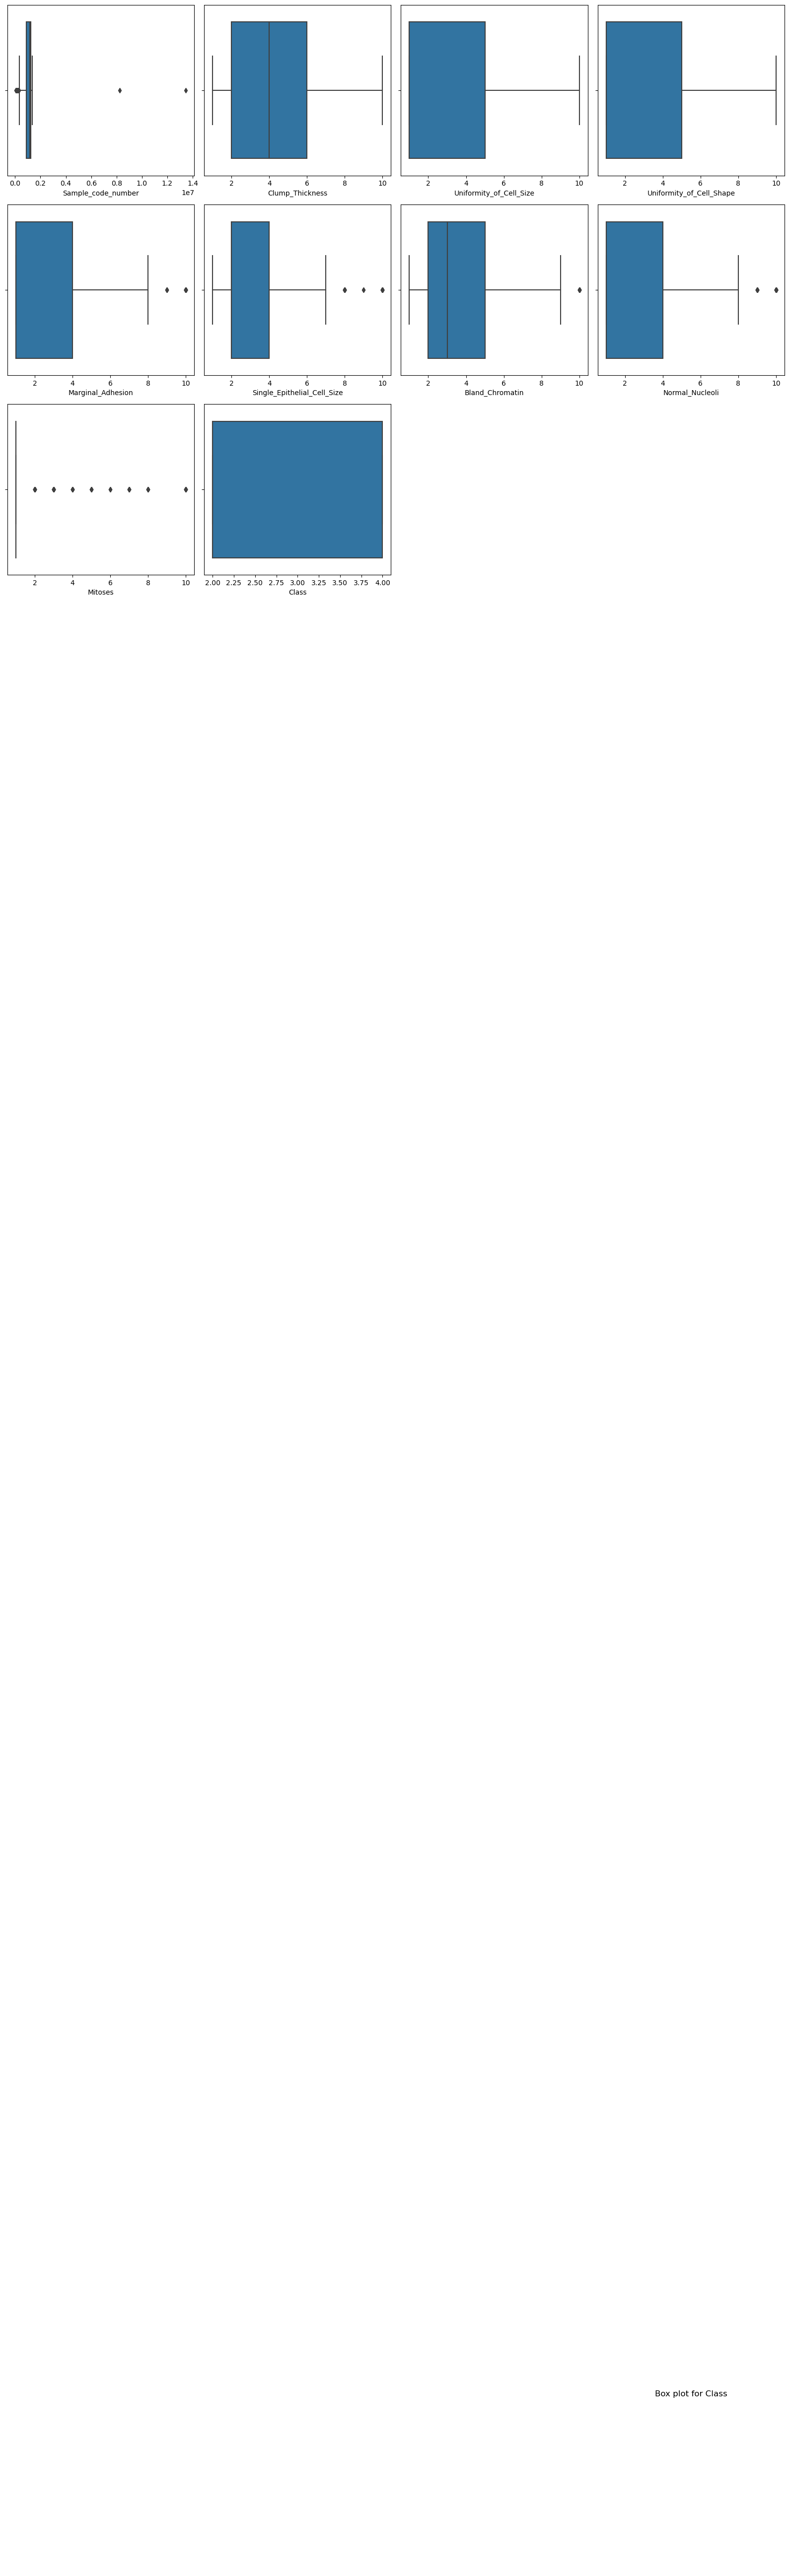

In [29]:
def box_plot(df):
    num_cols = len(df.select_dtypes(include=["int64","float64"]).columns)
    num_rows = (num_cols+3)
    num_cols = min(num_cols,4)
    
    fig,axes = plt.subplots(num_rows,num_cols,figsize=(16,4*num_rows))
    
    axes = axes.flatten()
    
    for i,col in enumerate(df.select_dtypes(include=["int64","float64"]).columns):
        sns.boxplot(ax=axes[i],x =df[col])
        plt.title(f"Box plot for {col}")
        
    for j in range(i+1,len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()
        
box_plot(df)

In [30]:
threshold =  {"Sample_code_number":0.1, "Clump_Thickness":6, "Uniformity_of_Cell_Size":5, "Uniformity_of_Cell_Shape":5, "Marginal_Adhesion":4, "Single_Epithelial_Cell_Size":4, "Bare_Nuclei":5, "Bland_Chromatin":4, "Normal_Nucleoli":4, "Mitoses":1, "Class":4}

Removing outliers for Sample_code_number


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


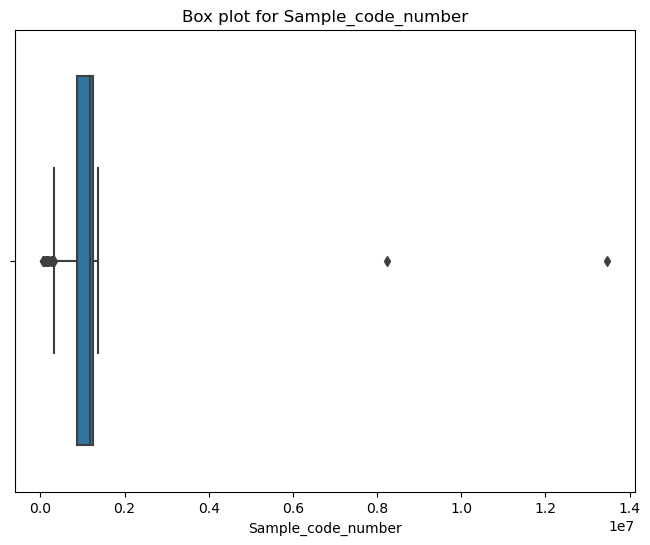

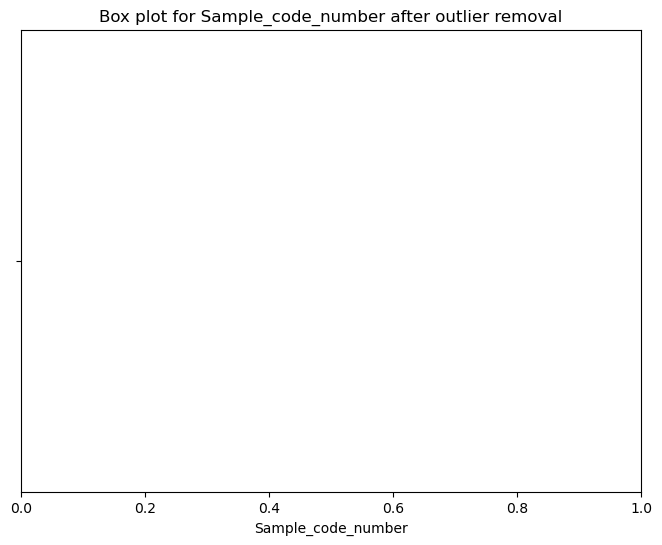

Removing outliers for Clump_Thickness


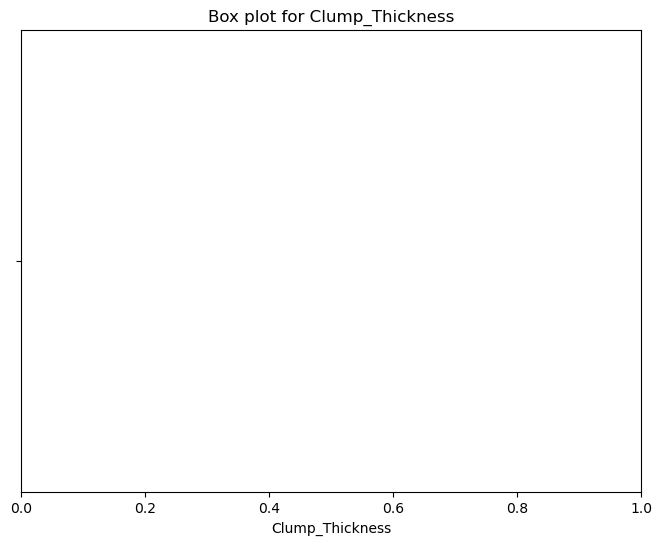

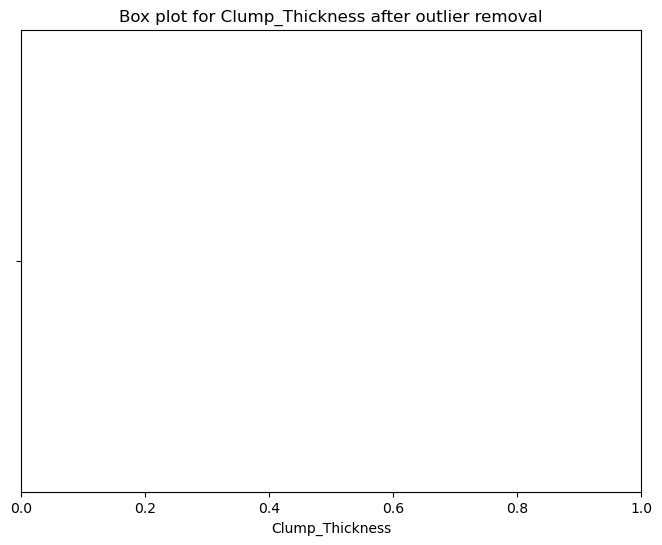

Removing outliers for Uniformity_of_Cell_Size


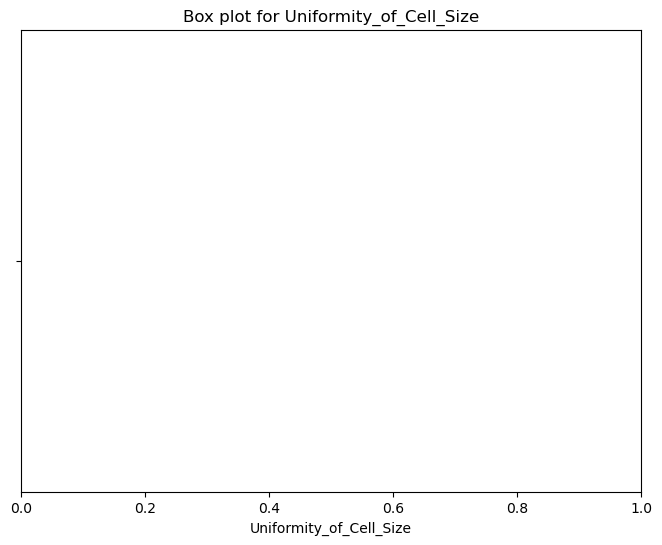

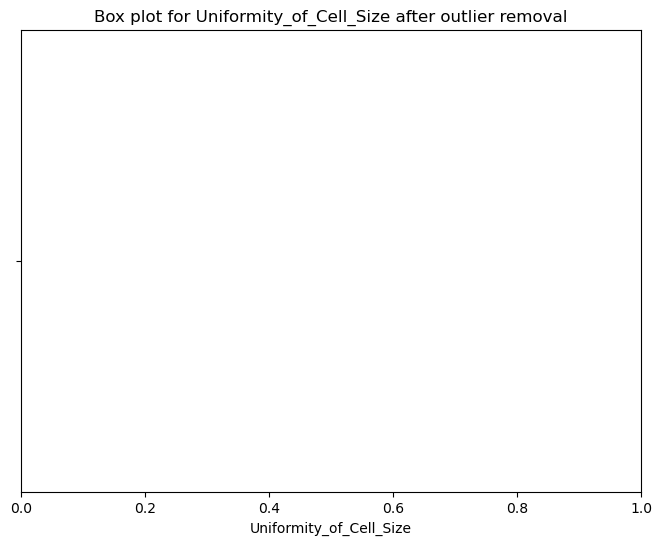

Removing outliers for Uniformity_of_Cell_Shape


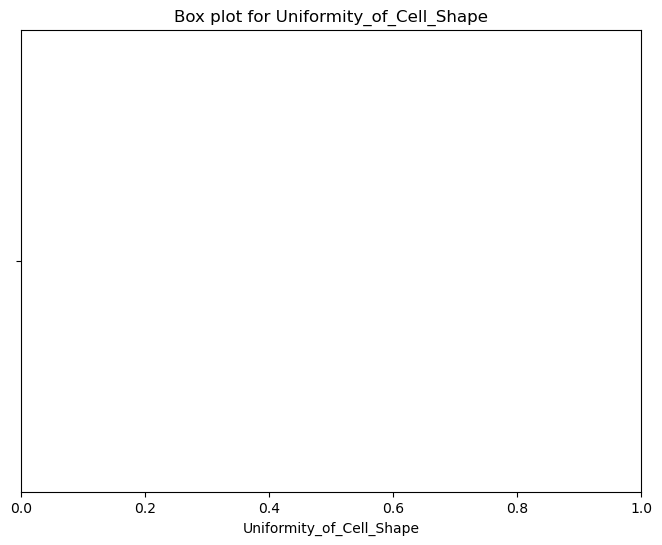

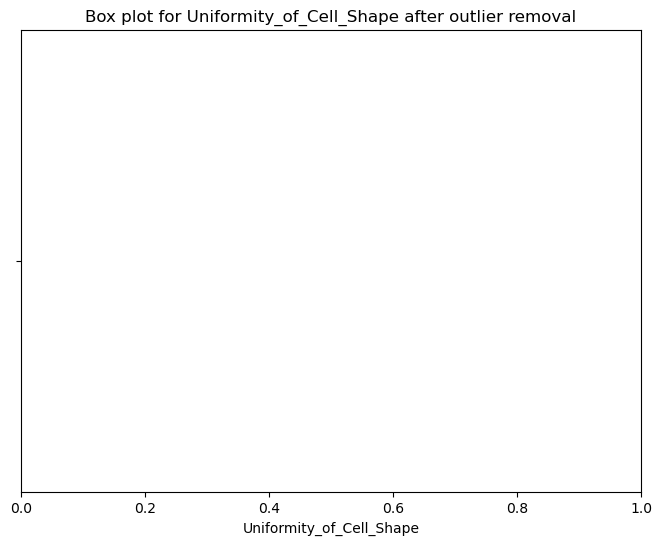

Removing outliers for Marginal_Adhesion


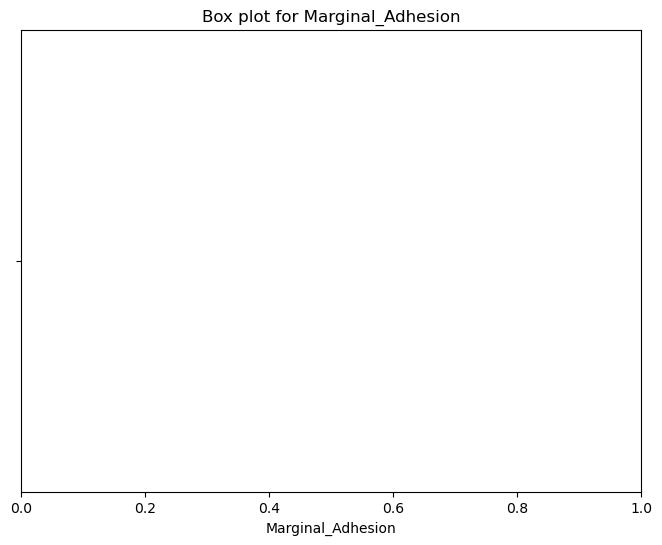

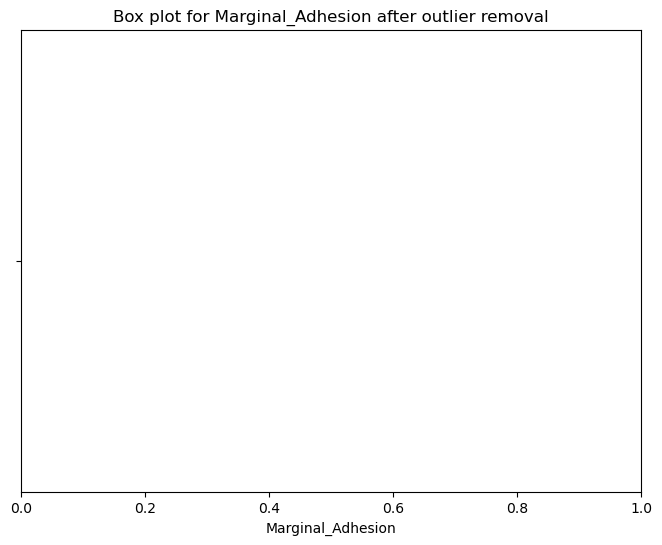

Removing outliers for Single_Epithelial_Cell_Size


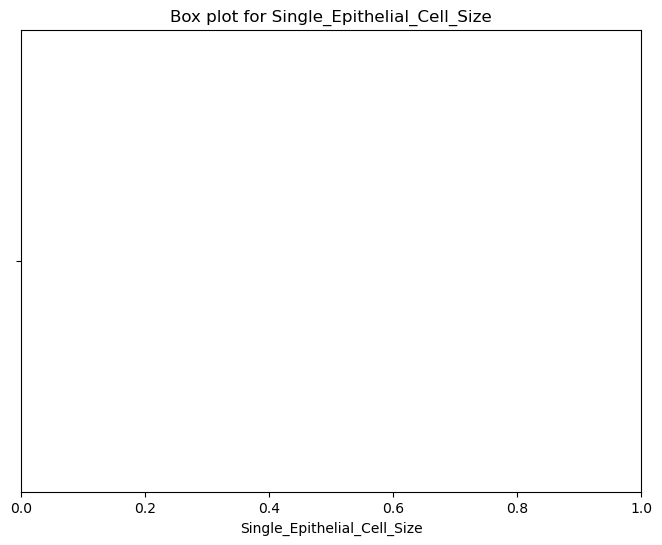

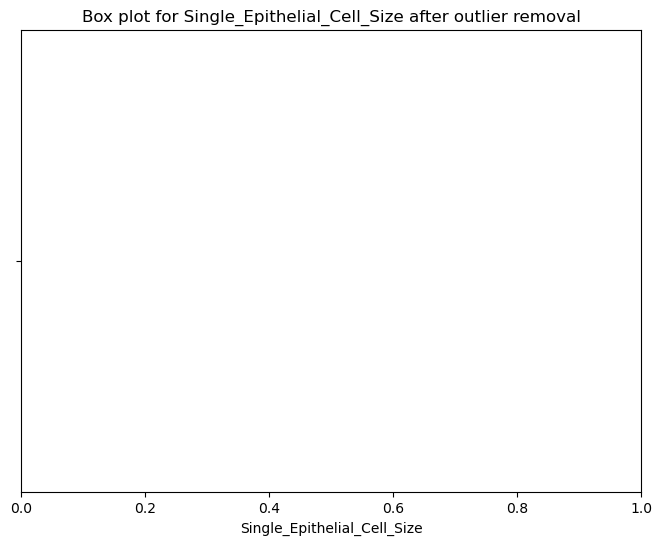

Removing outliers for Bare_Nuclei


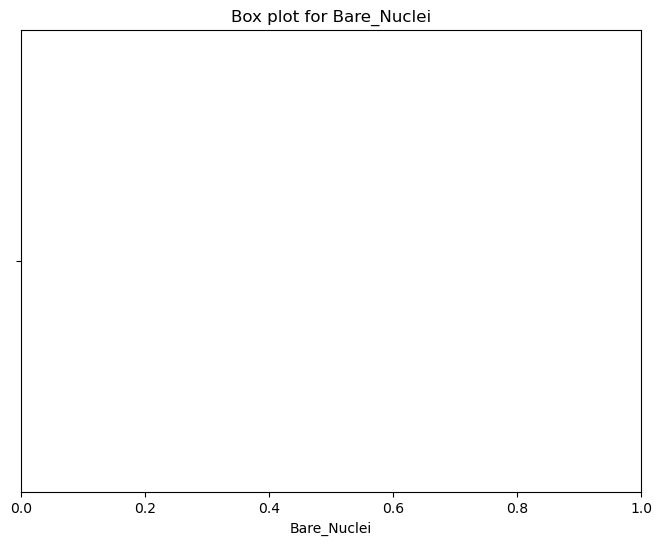

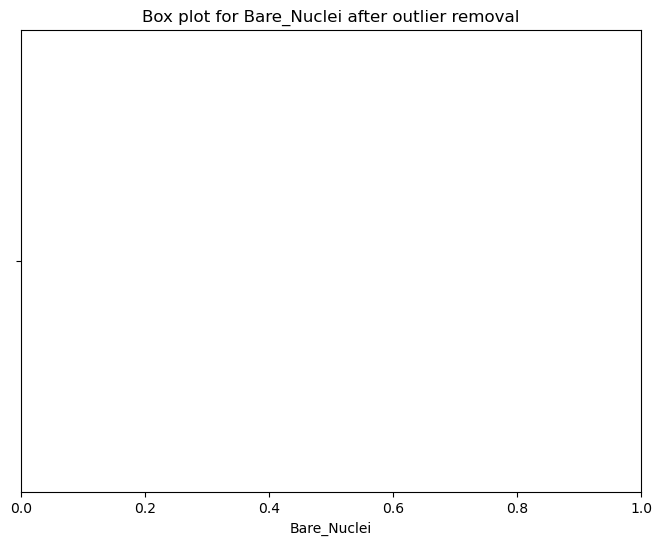

Removing outliers for Bland_Chromatin


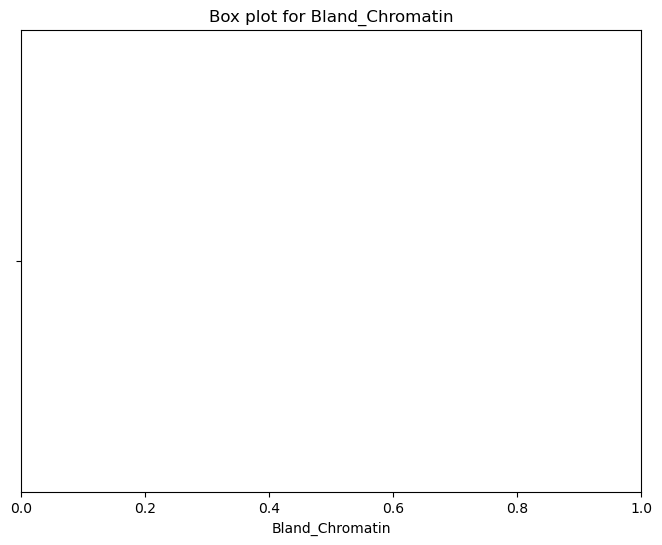

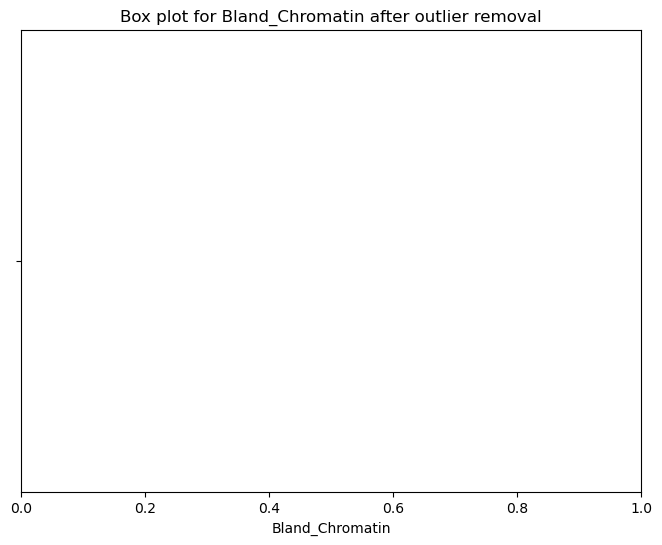

Removing outliers for Normal_Nucleoli


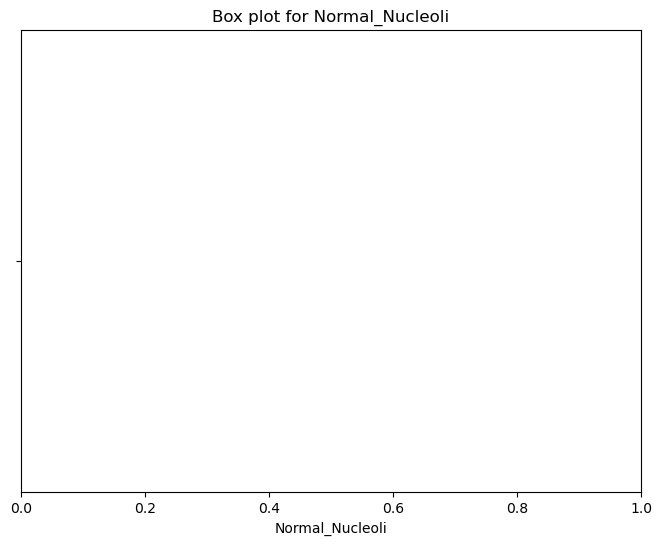

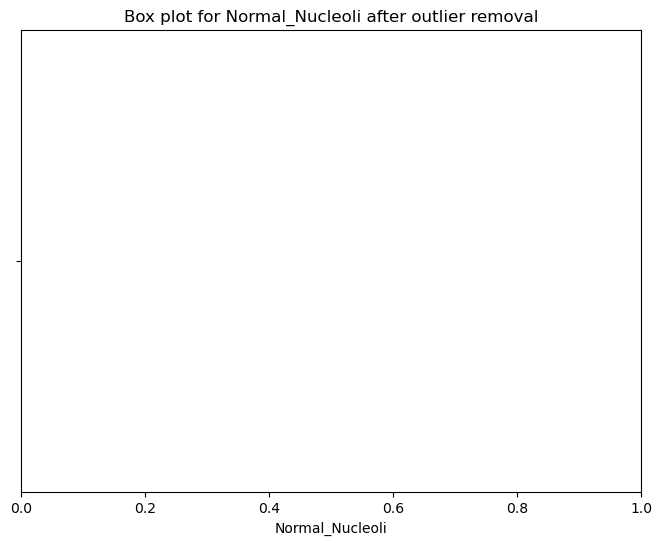

Removing outliers for Mitoses


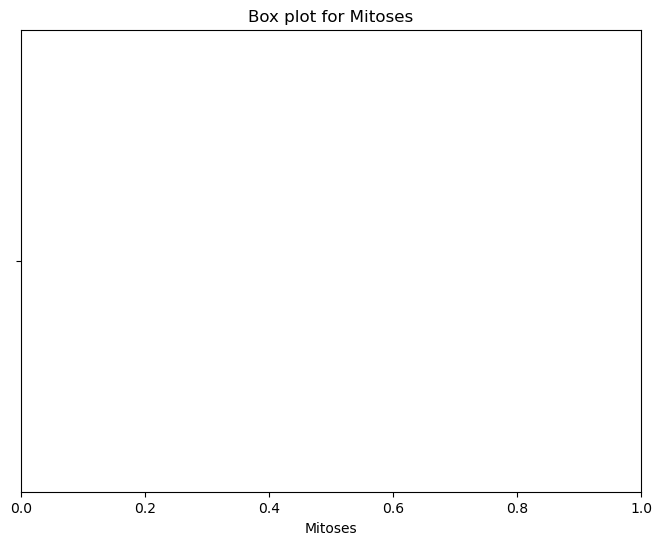

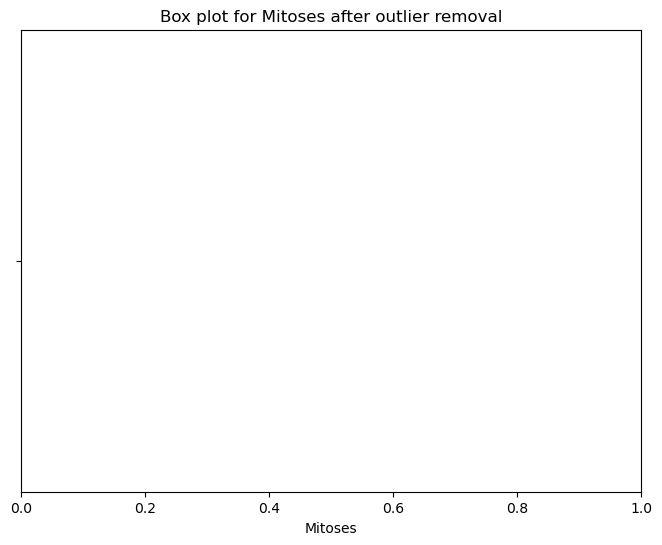

Removing outliers for Class


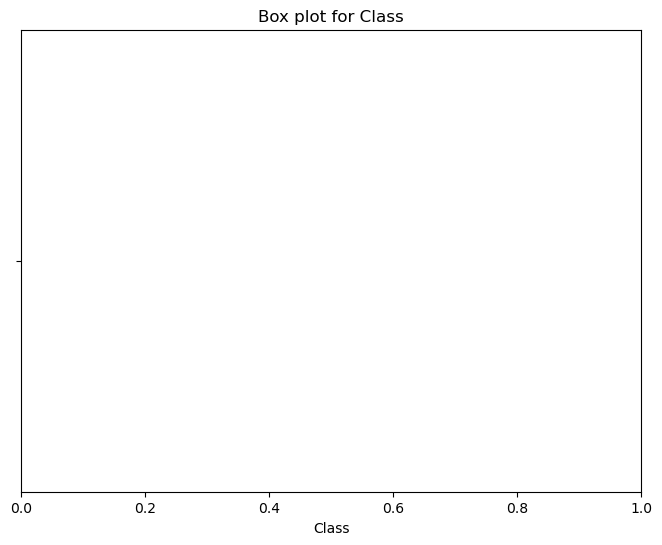

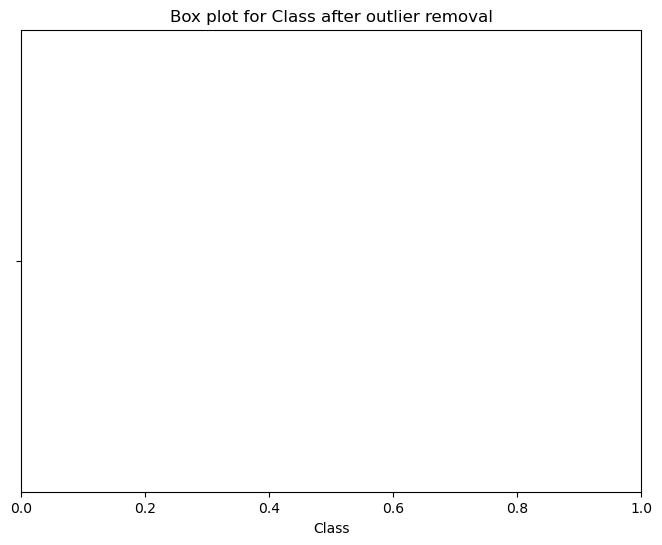

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def remove_box(col, thres, df):
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f"Box plot for {col}")
    
    remove = df[df[col] <= thres]
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(remove[col])
    plt.title(f"Box plot for {col} after outlier removal")
    plt.show()  # Display the plots
    
    return remove
    
def remove_outliers(df, threshold):
    for col, thres in threshold.items():
        print(f"Removing outliers for {col}")
        df = remove_box(col, thres, df)  # Update df with the filtered DataFrame
        
    return df

new_df = remove_outliers(df, threshold)


In [31]:
df

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [37]:
attributes = df[["Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses"]]

In [51]:
from sklearn.preprocessing import LabelEncoder
df.loc[df['Class']==2,'Class']='Y'
df.loc[df['Class']==4,'Class']='N'
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10.0,3,2,1,Y
1,1015425,3,1,1,1,2,2.0,3,1,1,Y
2,1016277,6,8,8,1,3,4.0,3,7,1,Y
3,1017023,4,1,1,3,2,1.0,3,1,1,Y
4,1017122,8,10,10,8,7,10.0,9,7,1,N


<AxesSubplot:>

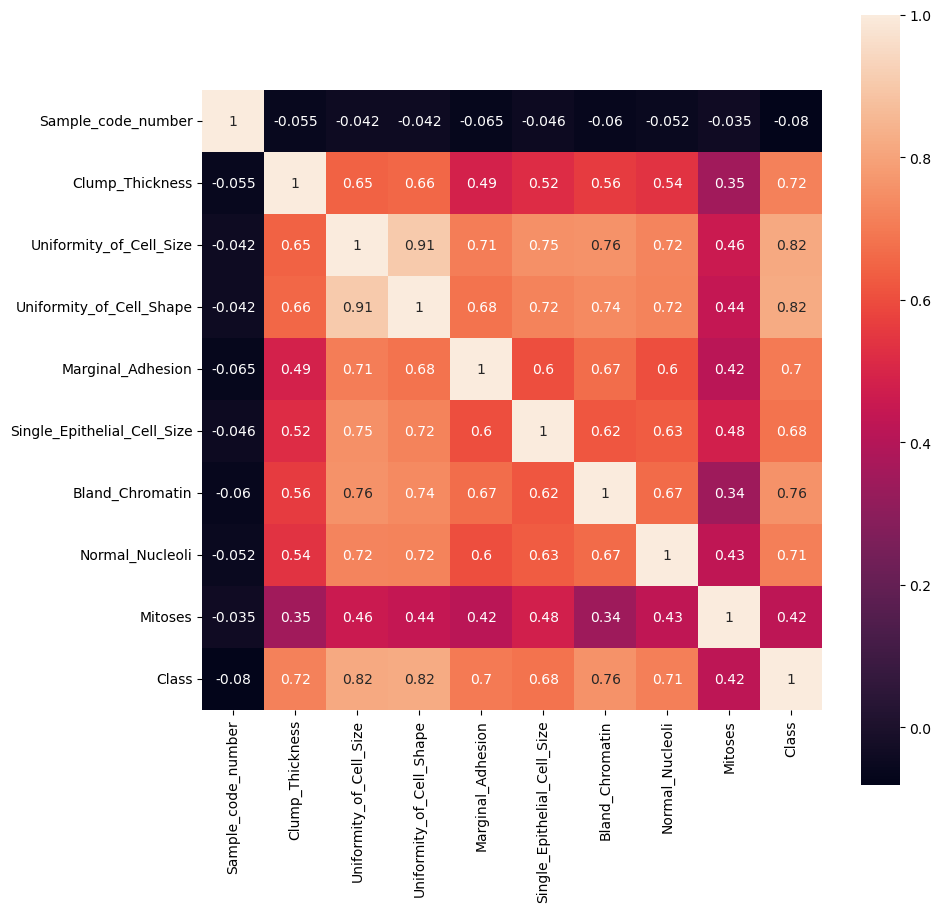

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(),cbar=True,square=True,annot=True)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(attributes,df["Class"],test_size=0.25,random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_acc = accuracy_score(lg_pred,y_test)
lg_acc

ValueError: could not convert string to float: '?'

In [45]:
df.replace('?', np.nan, inplace=True)

# Convert DataFrame to numeric type
df = df.apply(pd.to_numeric)

# Impute missing values (replace NaN with mean)
df.fillna(df.mean(), inplace=True)